    March, 4th 2022

### **Statistics Exercise**

<hr>

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
np.warnings.filterwarnings('ignore')

**Load Dataset**

In [3]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<hr>

## **No. 1**

**Tampilkan statistik deskriptif pada variabel Rooms, Distance, Landsize, dan Price!**

In [4]:
df[['Rooms', 'Distance', 'Landsize', 'Price']].describe()

,Rooms,Distance,Landsize,Price
count,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,558.416127,1.075684e+06
std,0.955748,5.868725,3990.669241,6.393107e+05
min,1.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.100000,177.000000,6.500000e+05
50%,3.000000,9.200000,440.000000,9.030000e+05
75%,3.000000,13.000000,651.000000,1.330000e+06
max,10.000000,48.100000,433014.000000,9.000000e+06


<hr>

## **No. 2**

**a) Berapa jumlah Rooms pada rumah yang harganya paling mahal?**


In [5]:
df[df['Price'] == df['Price'].max()][['Rooms']]

,Rooms
12094,3


**b) Berapa rata-rata harga rumah yang jarak ke CBD-nya terdekat?**

In [6]:
df[df['Distance'] == df['Distance'].min()]['Price'].mean()

671166.6666666666

**c) Berapa rata-rata harga rumah yang luas tanahnya 1 kali standar deviasi di atas rata-rata luas tanah?**

In [7]:
land_mean = df['Landsize'].mean()
land_std = df['Landsize'].std()

df[df['Landsize'] > (land_mean + land_std)]['Price'].mean()

880776.6666666666

**d) Berapa rentang harga rumah pada region ``Southern Metropolitan``?**

In [8]:
df_sm = df[df['Regionname'] == 'Southern Metropolitan']

price_range = df_sm['Price'].max() - df_sm['Price'].min()
price_range

7869000.0

<hr>

## **No. 3**

* Nilai outliers adalah nilai yang berada di bawah ``Q1 - (1.5 * IQR)`` atau di atas ``Q3 + (1.5 * IQR)``
* Hitung dahulu Q1, Q2, dan IQR pada pada variabel **Price** (harga rumah)
* **Hitung ada berapa nilai outliers pada variabel Price!**

In [9]:
import numpy as np

df['Price'] = df['Price'].apply(np.int64)

In [10]:
q1 = df['Price'].describe()['25%']
q3 = df['Price'].describe()['75%']

iqr = q3 - q1
iqr

680000.0

In [11]:
batas_bawah = int(q1 - (1.5 * iqr))
batas_atas = int(q3 + (1.5 * iqr))

In [12]:
outlier_price = df[(df['Price'] < batas_bawah) | (df['Price'] > batas_atas)][['Price']]
outlier_price.head()

,Price
80,2850000
92,2615000
97,2575000
102,3010000
103,2800000


In [13]:
# Jumlah outlier pada kolom 'Price'
len(outlier_price)

612

In [14]:
outlier_price.index

Int64Index([   80,    92,    97,   102,   103,   108,   112,   118,   124,
              233,
            ...
            13466, 13468, 13474, 13483, 13518, 13521, 13523, 13553, 13555,
            13578],
           dtype='int64', length=612)

<hr>

## **No. 4**

**Uji asumsi normalitas untuk variabel 'Price' dengan menggunakan Shapiro Wilk dan D'Agostino and Pearson's test! Apakah terdapat perbedaan hasil antara keduanya?**

#### **``Shapiro Wilk Test``**

Menguji asumsi normalitas variabel ``Price``

#### **Interpretation**
* If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
* If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [15]:
from scipy.stats import shapiro

sw_statistic, sw_pvalue = shapiro(df['Price'])

if sw_pvalue > 0.05:
    print(f'P-value: {sw_pvalue}. So, we assume a normal distribution')
else:
    print(f'P-value: {sw_pvalue}. So, we do not assume a normal distribution')

P-value: 0.0. So, we do not assume a normal distribution


#### **``D’Agostino and Pearson’s Test``**

Menguji asumsi normalitas variabel ``Price``

#### **Interpretation**
* If the P-Value of the D'Agostino-Pearson Test is larger than 0.05, we assume a normal distribution
* If the P-Value of the D'Agostino-Pearson Test is smaller than 0.05, we do not assume a normal distribution

In [16]:
from scipy.stats import normaltest
dp_statistic, dp_pvalue = normaltest(df['Price'])

if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}. So, we assume a normal distribution')
else:
    print(f'P-value: {dp_pvalue}. So, we do not assume a normal distribution')

P-value: 0.0. So, we do not assume a normal distribution


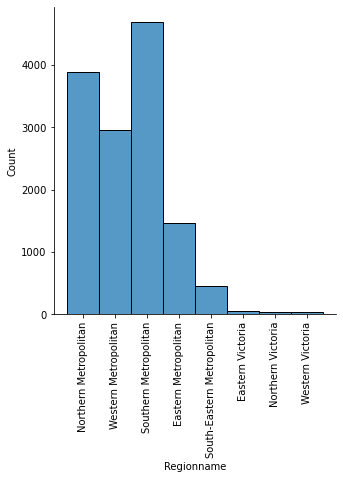

In [17]:
sns.displot(x=df['Regionname'])
plt.xticks(rotation=90);

<hr>

## **No. 5**

**Hitung seberapa kuat korelasi variabel Rooms dengan Price, interpretasikan hasilnya!**

In [18]:
df['Rooms'].corr(df['Price'], method = 'spearman')

0.5398855194767743

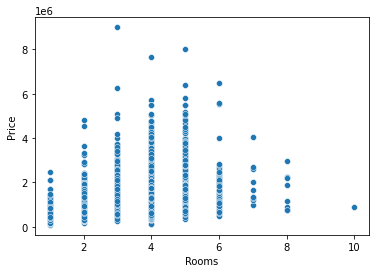

In [19]:
sns.scatterplot(x='Rooms', y='Price', data=df);

<hr>

## **No. 6**

**Dari beberapa Regionname yang ada, manakah Regionname yang variabel jumlah kamarnya memiliki korelasi terkuat dengan variabel harga rumah?**

In [20]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [21]:
corr = []

for i in df['Regionname'].unique():
    corr.append(df[df['Regionname'] == i]['Rooms'].corr(df[df['Regionname']==i]['Price'], method= 'spearman'))
    
pd.DataFrame(data = corr, index = df['Regionname'].unique(), columns = ['Correlation Price vs Rooms']
            ).sort_values('Correlation Price vs Rooms', ascending=False)

,Correlation Price vs Rooms
Southern Metropolitan,0.766518
Eastern Metropolitan,0.581459
Western Metropolitan,0.456401
South-Eastern Metropolitan,0.454070
Northern Metropolitan,0.413107
Western Victoria,0.409389
Eastern Victoria,0.307374
Northern Victoria,0.282841


<hr>

## **No. 7**

**Hitung seberapa kuat korelasi variabel Distance dengan Price, interpretasikan hasilnya!**

In [22]:
df['Distance'].corr(df['Price'], method='spearman')

-0.12998984131880323

<hr>

## **No. 8**

**Dari beberapa Regionname, manakah Regionname yang jarak ke CBD-nya paling tidak berkorelasi dengan variabel harga rumah? Serta tampilkan juga Regionname yang paling berkorelasi dengan kedua variabel ini!**

In [23]:
corr = []

for i in df['Regionname'].unique():
    corr.append(df[df['Regionname'] == i]['Distance'].corr(df[df['Regionname']==i]['Price'], method= 'spearman'))
    
pd.DataFrame(data = corr, index = df['Regionname'].unique(), columns = ['Correlation Price vs Distance']
            ).sort_values('Correlation Price vs Distance', ascending=True)

,Correlation Price vs Distance
South-Eastern Metropolitan,-0.502399
Eastern Victoria,-0.416652
Western Metropolitan,-0.385143
Northern Metropolitan,-0.360062
Northern Victoria,-0.025805
Eastern Metropolitan,-0.004717
Southern Metropolitan,0.057611
Western Victoria,0.061756


* Regionname yang paling tidak berkorelasi atau korelasinya paling lemah di dua variabel di atas adalah **Eastern Metropolitan** (-0.004717 atau -0.47 persen).
* Regionname yang paling berkorelasi di dua variabel di atas adalah **South-Eastern Metropolitan** (-0.502399 atau -50 persen).

<hr>

## **Nomor 9**

**Lakukan uji hipotesis untuk membuktikan secara statistics apakah metode pembelian berkaitan dengan tipe rumah (dependen) atau tidak saling berkaitan (independen)!**

In [24]:
df_ct = pd.crosstab(df['Type'], df['Method'])
df_ct

Method,PI,S,SA,SP,VB
Type,,,,,
h,1069,6507,66,1079,728
t,134,723,7,143,107
u,361,1792,19,481,364


#### **Hypothesis:**
* Ho : The two variables are independent
* Ha :  The two variables are dependent.

In [25]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(df_ct)

# conclusion
alpha = 0.05
print('P value:', p)

if p <= alpha:
    print('Dependent (reject Ho)')
else:
    print('Independent (fail to reject Ho)')

P value: 3.183702485154384e-22
Dependent (reject Ho)


<hr>

## **Nomor 10**

Lakukan uji hipotesis untuk membuktikan secara statistics apakah median harga rumah antar Regionname berbeda ataukah sama!

**Hipotesis**:
* Ho : med1 = med2 = … = medk (Median harga rumah antar Regionname sama)  
* Ha : Setidaknya ada satu pasang Regionname yang median harga rumahnya tidak sama, tapi kita tidak tahu yang mana

In [26]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [32]:
from scipy.stats import kruskal

kruskal(df[df['Regionname'] == 'Northern Metropolitan']['Price'],
         df[df['Regionname'] == 'Western Metropolitan']['Price'],
         df[df['Regionname'] == 'Southern Metropolitan']['Price'],
         df[df['Regionname'] == 'Eastern Metropolitan']['Price'],
         df[df['Regionname'] == 'South-Eastern Metropolitan']['Price'],
         df[df['Regionname'] == 'Eastern Victoria']['Price'],
         df[df['Regionname'] == 'Northern Victoria']['Price'],
         df[df['Regionname'] == 'Western Victoria']['Price']
        )

KruskalResult(statistic=1499.4894015306772, pvalue=0.0)

Jika p-value kurang dari sama dengan 0.05, maka ada cukup bukti untuk menolak Ho.
Berarti, setidaknya ada satu pasang Regionname yang perbedaan median harga rumahnya signifikan, tapi kita tidak tahu yang mana.

In [28]:
values = []
for i in df['Regionname'].unique():
    values.append(round(df[df['Regionname']==i]['Price'].median(), 2))
    
pd.DataFrame(data=values, index=df['Regionname'].unique(), columns=['Price median']
            ).sort_values(by='Price median', ascending=False)

,Price median
Southern Metropolitan,1250000.0
Eastern Metropolitan,1010000.0
South-Eastern Metropolitan,850000.0
Northern Metropolitan,806250.0
Western Metropolitan,793000.0
Eastern Victoria,670000.0
Northern Victoria,540000.0
Western Victoria,400000.0


<hr>